Model Accuracy: 0.9860801781737194
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4733
        REAL       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



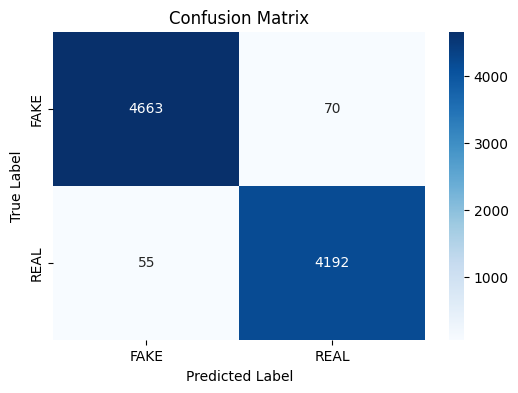

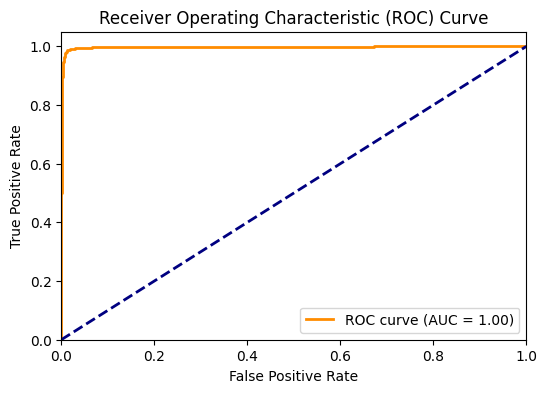

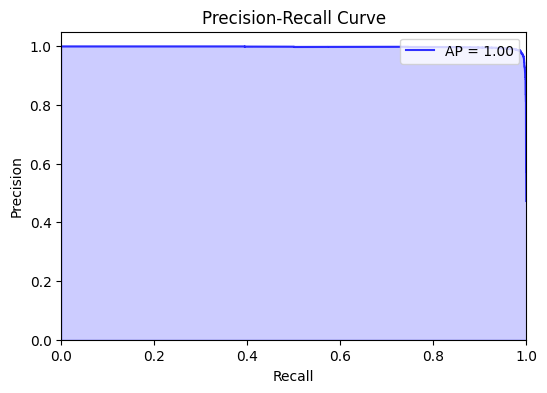

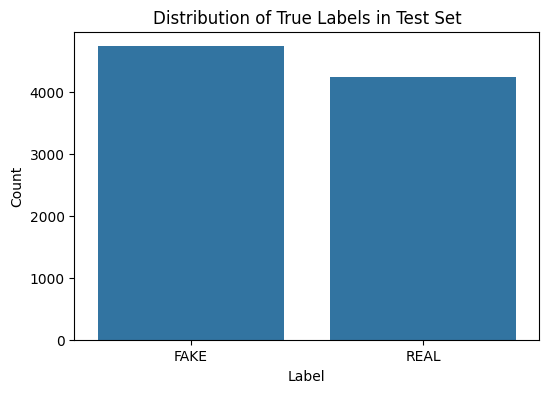

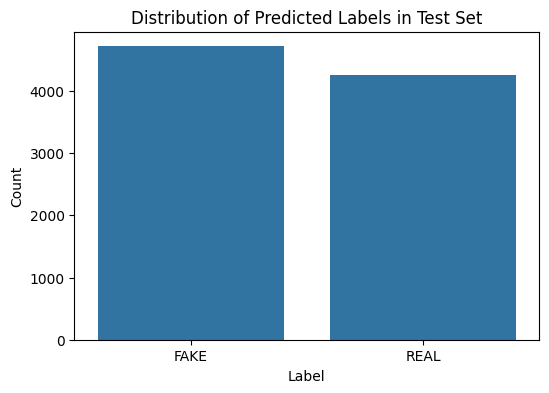

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Data Loading and Preprocessing
# -------------------------------
# Load the datasets
fake = pd.read_csv(f'D:/Fake News Detection - Copy (2)/Dataset/fake.csv')
real = pd.read_csv(f'D:/Fake News Detection - Copy (2)/Dataset/true.csv')

# Add a label column to each dataframe
fake['label'] = 'FAKE'
real['label'] = 'REAL'

# Combine both datasets into one dataframe
data = pd.concat([fake, real], ignore_index=True)

# (Optional) Combine title and text if desired:
# data['text'] = data['title'] + " " + data['text']

# Use only the 'text' column as features and 'label' as target
X = data['text']
y = data['label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# -------------------------------
# Model Training and Evaluation
# -------------------------------
# Train a Logistic Regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluate the model
predictions = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

# Print the Classification Report
report = classification_report(y_test, predictions, target_names=["FAKE", "REAL"])
print("Classification Report:")
print(report)

# -------------------------------
# Visualization 1: Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, predictions, labels=["FAKE", "REAL"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["FAKE", "REAL"], 
            yticklabels=["FAKE", "REAL"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("confusion_matrix.png")  # Save image for download
plt.show()

# -------------------------------
# Visualization 2: ROC Curve
# -------------------------------
from sklearn.metrics import roc_curve, auc

# Convert labels to binary (assuming REAL is the positive class)
y_test_binary = (y_test == "REAL").astype(int)
# Get predicted probabilities for the positive class ("REAL")
proba = model.predict_proba(X_test_tfidf)
# Find the index of "REAL" in model.classes_
real_index = list(model.classes_).index("REAL")
y_proba = proba[:, real_index]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")  # Save image for download
plt.show()

# -------------------------------
# Visualization 3: Precision-Recall Curve
# -------------------------------
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds_pr = precision_recall_curve(y_test_binary, y_proba)
avg_precision = average_precision_score(y_test_binary, y_proba)

plt.figure(figsize=(6, 4))
plt.step(recall, precision, where='post', color='b', alpha=0.8, label=f'AP = {avg_precision:0.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.savefig("precision_recall_curve.png")  # Save image for download
plt.show()

# -------------------------------
# Visualization 4: Distribution of True Labels
# -------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title("Distribution of True Labels in Test Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.savefig("true_label_distribution.png")  # Save image for download
plt.show()

# -------------------------------
# Visualization 5: Distribution of Predicted Labels
# -------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x=predictions)
plt.title("Distribution of Predicted Labels in Test Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.savefig("predicted_label_distribution.png")  # Save image for download
plt.show()

# -------------------------------
# Save the trained model and vectorizer
# -------------------------------
with open('model_updated.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('vectorizer_updated.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)
